In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

from google.colab import files 
import io
uploaded = files.upload()
df = pd.read_excel (io.BytesIO(uploaded['PCA.xlsx']))
print(df.head())
x =  df.iloc[:, [0,1]].values

Saving PCA (FIX).xlsx to PCA (FIX).xlsx
   principal component 1  principal component 2
0               3.239836              -0.091442
1               0.450831              -1.586577
2               3.239836              -0.091442
3               3.239836              -0.091442
4               1.223224              -1.783879


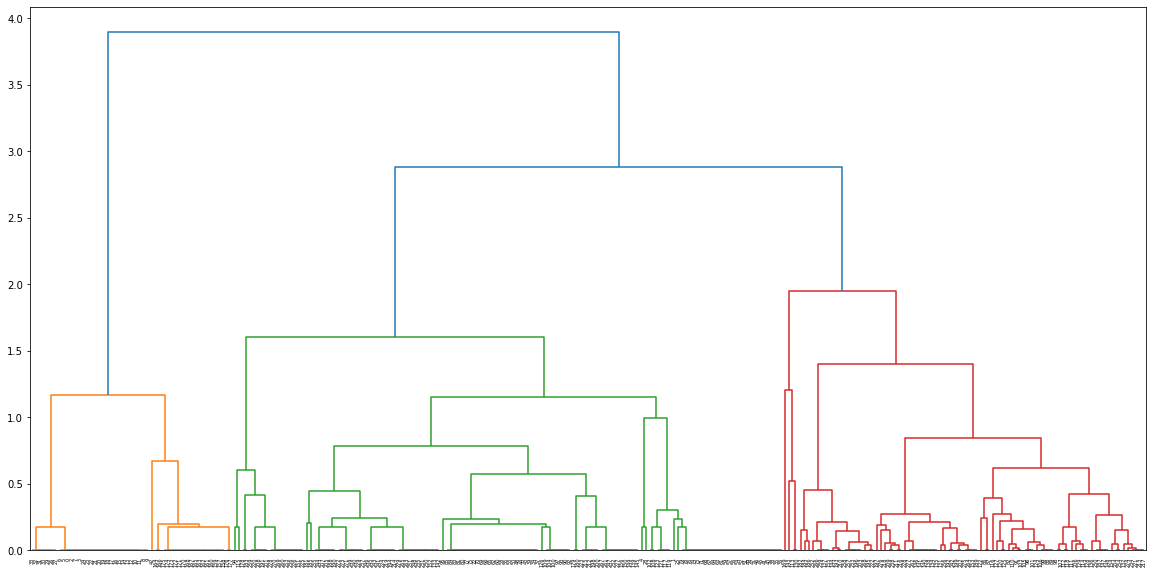

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(x, method='average'))

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
label = clustering.fit_predict(x)
print(label)

[1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 2 0 2 2 2 2 0 2 0 0 2 0 2 0 2 0 0 0 2 2 0
 0 0 0 0 2 0 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0
 0 2 2 2 2 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 0 2 0
 2 0 0 2 0 2 2 0 0 2 0 0 0 2 0 2 2 0 0 0 2 0 2 2 0 0 0 2 0 2 2 0 0 0 2 2 0
 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 0 0 0
 2 2 2 0 2 0 2 0 2 0 2 2 2 2 2 0 0 0 0 2 2]


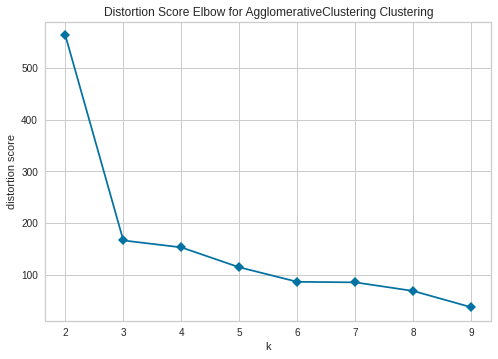

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),locate_elbow='false',timings=False)
visualizer.fit(x)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
print(visualizer.k_scores_)

[563.3004467748415, 166.2497759311834, 152.8282358420693, 114.25860701932285, 86.16116699434171, 85.07264298271637, 68.43665933889143, 36.96480013874214]


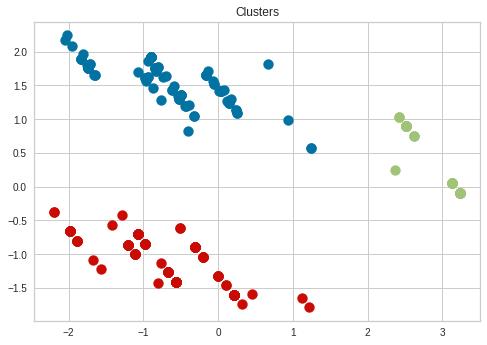

In [ ]:
plt.scatter(x[label == 0, 0], x[label == 0, 1], s = 100, label = 'Type 1')
plt.scatter(x[label == 1, 0], x[label == 1, 1], s = 100, label = 'Type 2')
plt.scatter(x[label == 2, 0], x[label == 2, 1], s = 100, label = 'Type 3')

plt.title('Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, label, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.693


0.6926446997261522


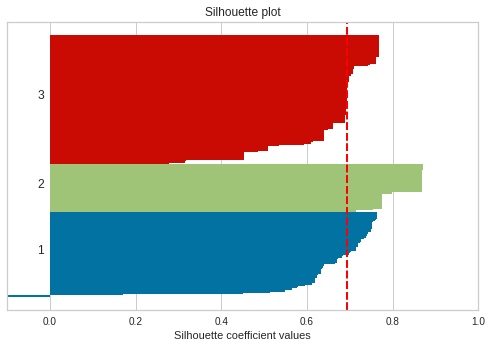

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

fig, ax = plt.subplots(figsize=(7,5))
silhouette_vals = silhouette_samples(x,label)

tes =[]
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(label)):
  tes.append(silhouette_vals[label == label].mean())
  cluster_silhouette_vals = silhouette_vals[label ==cluster]
  cluster_silhouette_vals.sort()
  y_upper += len(cluster_silhouette_vals)
   
  ax.barh(range(y_lower,y_upper),
  cluster_silhouette_vals,height =1);
  ax.text(-0.03,(y_lower+y_upper)/2,str(i+1))
  y_lower += len(cluster_silhouette_vals)
       
  # Get the average silhouette score 
  avg_score = np.mean(silhouette_vals)
  ax.axvline(avg_score,linestyle ='--',
  linewidth =2,color = 'red')
  ax.set_yticks([])
  ax.set_xlim([-0.1, 1])
  ax.set_xlabel('Silhouette coefficient values')
  ax.set_title('Silhouette plot'); 

  plt.tight_layout()
print(avg_score)

In [ ]:
df['cluster'] = label

df.to_excel('Hierarchical.xlsx')
files.download('Hierarchical.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>